In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math


trainingSensor = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/1.Training/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Training_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")
validationSensor = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/2.Validation/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Validation_원천데이터/2_센서 데이터/1_자포니카/센서 측정값 데이터/sensor_val_tb.csv")

trainingFood = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/1.Training/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Training_원천데이터/3_관리 데이터/1_자포니카/2_사료 공급관리 데이터/food_supply_tb.csv")
validationFood = pd.read_csv("E:/kimwoojae/AIGrowthModel/Eel/data/109.지능형 스마트양식장 이미지 데이터(뱀장어)/01.데이터/2.Validation/원천데이터/1-66_스마트양식장_이미지(뱀장어)_Validation_원천데이터/3_관리 데이터/1_자포니카/2_사료 공급관리 데이터/food_supply_tb.csv")

In [39]:
#trainingFood[['feed_quantity','water_quantity']] = trainingFood[['feed_quantity','water_quantity']].apply(str)
#trainingFood.info()
trainingFood.loc[trainingFood['feed_quantity'] != None, 'feed_quantity'] = 1
trainingFood.loc[trainingFood['water_quantity'] != None, 'water_quantity'] = 1

In [40]:
trainingSensor["mea_dt"] = trainingSensor["mea_dt"].apply(str)
trainingSensor["mea_dt"] = trainingSensor["mea_dt"].str.slice(start=0, stop=15)
trainingFood['feed_dt'] = pd.to_datetime(trainingFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
trainingFood["feed_dt"] = trainingFood["feed_dt"].apply(str)
trainingFood["feed_dt"] = trainingFood["feed_dt"].str.slice(start=0, stop=15)

validationSensor["mea_dt"] = validationSensor["mea_dt"].apply(str)
validationSensor["mea_dt"]  = validationSensor["mea_dt"].str.slice(start=0, stop=15)
validationFood['feed_dt'] = pd.to_datetime(validationFood['feed_dt'], format='%Y%m%d%H%M', errors='raise')
validationFood["feed_dt"] = validationFood["feed_dt"].apply(str)
validationFood["feed_dt"] = validationFood["feed_dt"].str.slice(start=0, stop=15)

In [41]:
trainingSensor.head()

,Unnamed: 0,farm_id,tank_id,mea_dt,do_mg,do_temp,ph,orp,co2_mg,air_oxy,light_ma
0,0,1,1,2021-07-15 19:0,8.8,30.3,5.28,160.0,14.6,0.0,4.0
1,1,1,2,2021-07-15 19:0,7.3,32.2,5.23,334.6,0.5,0.0,4.1
2,2,1,3,2021-07-15 19:0,7.3,32.0,5.97,325.6,0.6,0.0,4.0
3,3,1,4,2021-07-15 19:0,6.9,30.8,5.71,135.0,20.5,0.0,4.0
4,4,1,5,2021-07-15 19:0,10.4,28.4,4.54,135.0,18.3,0.0,4.0


In [42]:
test1 = trainingSensor[(trainingSensor['mea_dt'].str.contains('2021-07-21 04:3'))&(trainingSensor['tank_id']==1)]
test1

,Unnamed: 0,farm_id,tank_id,mea_dt,do_mg,do_temp,ph,orp,co2_mg,air_oxy,light_ma
38835,38835,1,1,2021-07-21 04:3,7.6,30.2,5.20,211.9,12.5,0.0,4.1
38840,38840,1,1,2021-07-21 04:3,7.6,30.2,5.20,210.6,12.5,0.0,3.9
38845,38845,1,1,2021-07-21 04:3,7.6,30.2,5.20,210.5,12.5,0.0,3.9
38850,38850,1,1,2021-07-21 04:3,7.5,30.2,5.20,210.8,12.6,0.0,4.0
38855,38855,1,1,2021-07-21 04:3,7.5,30.2,5.20,211.1,12.6,0.0,4.0
38860,38860,1,1,2021-07-21 04:3,7.4,30.2,5.19,211.5,12.6,0.0,4.0
38865,38865,1,1,2021-07-21 04:3,7.4,30.2,5.19,211.5,12.5,0.0,4.0
38870,38870,1,1,2021-07-21 04:3,7.4,30.2,5.19,211.7,12.5,0.0,4.0
38875,38875,1,1,2021-07-21 04:3,7.3,30.2,5.20,211.4,12.5,0.0,3.9
38880,38880,1,1,2021-07-21 04:3,7.2,30.2,5.21,210.4,12.4,0.0,4.0


In [43]:
test2 = trainingFood[(trainingFood['feed_dt'].str.contains('2021-07-21'))&(trainingFood['tank_id']==1)]
test2

,farm_id,tank_id,feed_dt,feed_code,feed_quantity,water_quantity,add_code,add_quantity,add_code2,add_quantity2,add_code3,add_quantity3,add_code4,add_quantity4,add_code5,add_quantity5,reg_dt
0,1,1,2021-07-21 04:3,s2-g,1.0,1.0,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
1,1,1,2021-07-21 16:3,s2-g,1.0,1.0,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19


In [44]:
trainingFood.head()

,farm_id,tank_id,feed_dt,feed_code,feed_quantity,water_quantity,add_code,add_quantity,add_code2,add_quantity2,add_code3,add_quantity3,add_code4,add_quantity4,add_code5,add_quantity5,reg_dt
0,1,1,2021-07-21 04:3,s2-g,1.0,1.0,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
1,1,1,2021-07-21 16:3,s2-g,1.0,1.0,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
2,1,1,2021-07-22 04:3,s2-g,1.0,1.0,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
3,1,1,2021-07-22 16:3,s2-g,1.0,1.0,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
4,1,1,2021-07-23 04:3,s2-g,1.0,1.0,c3-g,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19


In [45]:
#training = pd.merge(left = trainingSensor, right = trainingFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
training = pd.merge(left = trainingSensor, right = trainingFood, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#training = training.dropna(axis=0)
#training.head()

In [46]:
test3 = training[(training['feed_dt'].str.contains('2021-07-21'))&(training['tank_id']==1)]
test3

,Unnamed: 0,farm_id,tank_id,mea_dt,do_mg,do_temp,ph,orp,co2_mg,air_oxy,...,add_quantity,add_code2,add_quantity2,add_code3,add_quantity3,add_code4,add_quantity4,add_code5,add_quantity5,reg_dt
38835,38835,1,1,2021-07-21 04:3,7.6,30.2,5.20,211.9,12.5,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
38840,38840,1,1,2021-07-21 04:3,7.6,30.2,5.20,210.6,12.5,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
38845,38845,1,1,2021-07-21 04:3,7.6,30.2,5.20,210.5,12.5,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
38850,38850,1,1,2021-07-21 04:3,7.5,30.2,5.20,210.8,12.6,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
38855,38855,1,1,2021-07-21 04:3,7.5,30.2,5.20,211.1,12.6,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
38860,38860,1,1,2021-07-21 04:3,7.4,30.2,5.19,211.5,12.6,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
38865,38865,1,1,2021-07-21 04:3,7.4,30.2,5.19,211.5,12.5,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
38870,38870,1,1,2021-07-21 04:3,7.4,30.2,5.19,211.7,12.5,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
38875,38875,1,1,2021-07-21 04:3,7.3,30.2,5.20,211.4,12.5,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19
38880,38880,1,1,2021-07-21 04:3,7.2,30.2,5.21,210.4,12.4,0.0,...,18.6,c1-g,12.4,c2-g,6.2,NaN,NaN,NaN,NaN,2021-09-16 18:55:19


In [47]:
#validation = pd.merge(left = validationSensor, right = validationFood, how = "inner", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
validation = pd.merge(left = validationSensor, right = validationFood, how = "left", left_on = ["farm_id","tank_id", "mea_dt"], right_on = ["farm_id","tank_id", "feed_dt"])
#validation = validation.dropna(axis=0)
#validation.head()

In [48]:
#training = training[training['tank_id']==2]
#validation = validation[validation['tank_id']==2]

In [49]:

training = training[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
validation = validation[['do_mg','do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
training = training.fillna(0)
validation = validation.fillna(0)

In [50]:
training = pd.get_dummies(training,columns=['feed_quantity','water_quantity'])
training

,do_mg,do_temp,ph,orp,co2_mg,air_oxy,light_ma,feed_quantity_0.0,feed_quantity_1.0,water_quantity_0.0,water_quantity_1.0
0,8.8,30.3,5.28,160.0,14.6,0.0,4.0,1,0,1,0
1,7.3,32.2,5.23,334.6,0.5,0.0,4.1,1,0,1,0
2,7.3,32.0,5.97,325.6,0.6,0.0,4.0,1,0,1,0
3,6.9,30.8,5.71,135.0,20.5,0.0,4.0,1,0,1,0
4,10.4,28.4,4.54,135.0,18.3,0.0,4.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1113743,9.8,28.7,5.04,216.9,32.5,11.3,4.2,1,0,1,0
1113744,6.6,29.3,4.80,213.0,35.6,1.4,4.1,1,0,1,0
1113745,9.7,29.0,4.60,220.2,21.9,3.7,3.5,1,0,1,0
1113746,8.6,29.2,5.22,215.2,31.0,15.0,4.1,1,0,1,0


In [51]:
#trainingSensor = trainingSensor.set_index('mea_dt')
#trainingSensor.head()
#training = training.set_index('mea_dt')
#validation = validation.set_index('mea_dt')

In [53]:
#x = training[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y = training[['do_mg']]
#x_train = trainingSensor[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_train = trainingSensor[['do_mg']]
#x_test = validationSensor[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma']]
#y_test = validationSensor[['do_mg']]
x_train = training[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity_0.0', 'feed_quantity_1.0','water_quantity_0.0','water_quantity_1.0']]
y_train = training[['do_mg']]
x_test = validation[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_test = validation[['do_mg']]
#x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#min_max_scaler = MinMaxScaler()
#min_max_scaler.fit(x_train)
#x_train_t = min_max_scaler.transform(x_train)
#x_train = pd.DataFrame(x_train_t, columns=x_train.columns, index=list(x_train.index.values))

In [54]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(x_train)
x_train_t = std_scaler.transform(x_train)
x_train = pd.DataFrame(x_train_t, columns=x_train.columns, index=list(x_train.index.values))

In [55]:
# shape확인
nCar = x_train.shape[0] # 데이터 개수
nVar = x_train.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_train.shape[0] # 데이터 개수
nVar = y_train.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

# shape확인
nCar = x_test.shape[0] # 데이터 개수
nVar = x_test.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar = y_test.shape[0] # 데이터 개수
nVar = y_test.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 1113748 nVar: 10
nCar: 1113748 nVar: 1
nCar: 1113748 nVar: 8
nCar: 1113748 nVar: 1


In [56]:
# 랜덤포레스트 득점모델 학습
rf_run = RandomForestRegressor(random_state=0, max_depth=5, min_samples_leaf=20, min_samples_split=20,n_estimators=50)
rf_run.fit(x_train, y_train.values.ravel())

#의사결정
dt_model = DecisionTreeRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5)
dt_model.fit(x_train, y_train.values.ravel())

#그래디언트
gb_model = GradientBoostingRegressor(random_state = 0, min_samples_leaf = 20, min_samples_split = 20, max_depth=5, learning_rate= 0.1)
gb_model.fit(x_train, y_train.values.ravel())

GradientBoostingRegressor(max_depth=5, min_samples_leaf=20,
                          min_samples_split=20, random_state=0)

In [57]:
# train rmse
rf_train_predict = rf_run.predict(x_train)
print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_train_predict, y_train))) )
 
# validation rmse
rf_valid_predict = rf_run.predict(x_test)
print("rf_RMSE':{}".format(math.sqrt(mean_squared_error(rf_valid_predict, y_test))) )

# train rmse
dt_train_predict = dt_model.predict(x_train)
print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_train_predict, y_train))) )
 
# validation rmse
dt_valid_predict = dt_model.predict(x_test)
print("dt_RMSE':{}".format(math.sqrt(mean_squared_error(dt_valid_predict, y_test))) )

# train rmse
gb_train_predict = gb_model.predict(x_train)
print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_train_predict, y_train))) )
 
# validation rmse
gb_valid_predict = gb_model.predict(x_test)
print("gb_RMSE':{}".format(math.sqrt(mean_squared_error(gb_valid_predict, y_test))) )
 
# test rmse
#RUN_T= RUN_2.drop(['HIT_TARGET','G_ID','T_ID','VS_T_ID', 'TB_SC', 'AB_TARGET','GDAY_DS'], axis =1)
#a11 = RUN_T.iloc[:, :-1]
#b11 = RUN_T.iloc[:, -1]
#rf_run_predict = rf_run.predict(a11)
#print("RMSE':{}".format(math.sqrt(mean_squared_error(rf_run_predict, b11))) )

rf_RMSE':1.6325913381840993


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- feed_quantity
- water_quantity
Feature names seen at fit time, yet now missing:
- feed_quantity_0.0
- feed_quantity_1.0
- water_quantity_0.0
- water_quantity_1.0


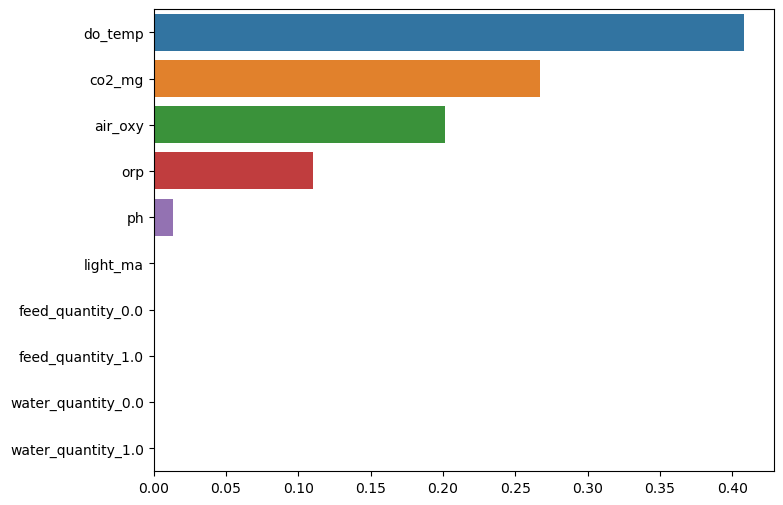

In [58]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = rf_run.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

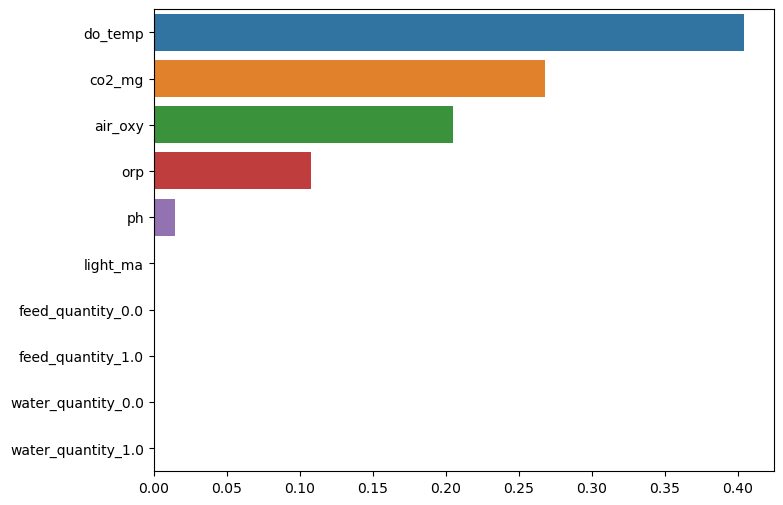

In [59]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = dt_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

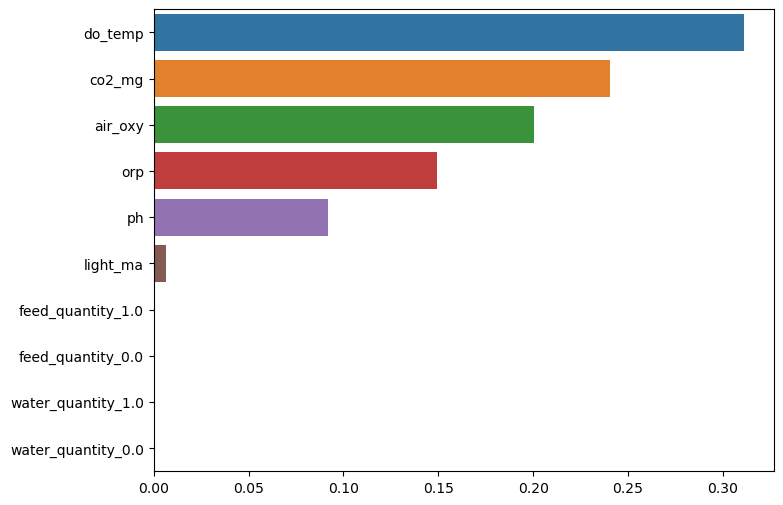

In [60]:
import matplotlib.pyplot as plt # 득점모델 변수 중요도
import seaborn as sns
 
ftr_importances_values = gb_model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]
 
plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.show()
 

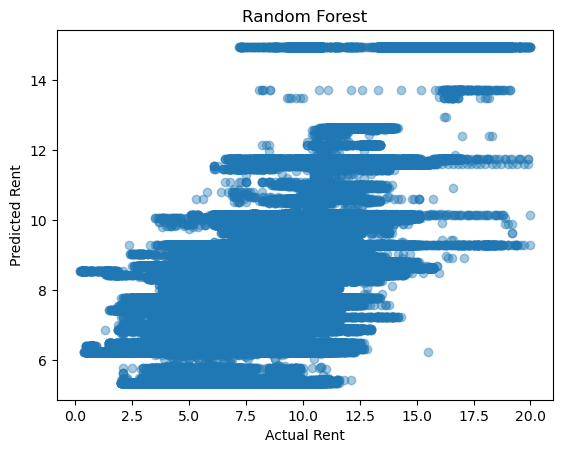

In [61]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, rf_train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Random Forest")
plt.show()

In [62]:
print(rf_run.score(x_train, y_train))

print(rf_run.score(x_test, y_test))

0.4060882510742492


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- feed_quantity
- water_quantity
Feature names seen at fit time, yet now missing:
- feed_quantity_0.0
- feed_quantity_1.0
- water_quantity_0.0
- water_quantity_1.0


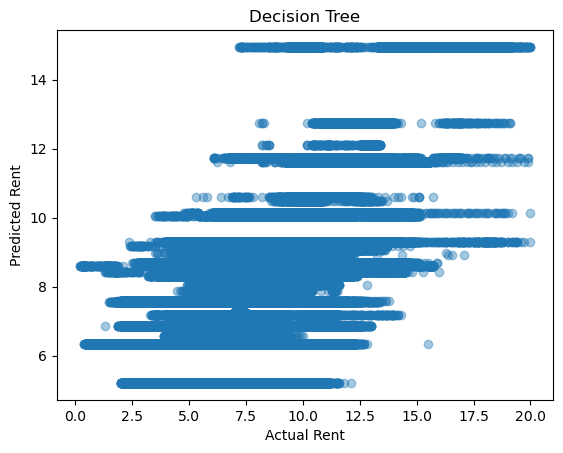

In [63]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, dt_train_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Decision Tree")
plt.show()

In [64]:
print(dt_model.score(x_train, y_train))

print(dt_model.score(x_test, y_test))

0.3966866125729095


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- feed_quantity
- water_quantity
Feature names seen at fit time, yet now missing:
- feed_quantity_0.0
- feed_quantity_1.0
- water_quantity_0.0
- water_quantity_1.0


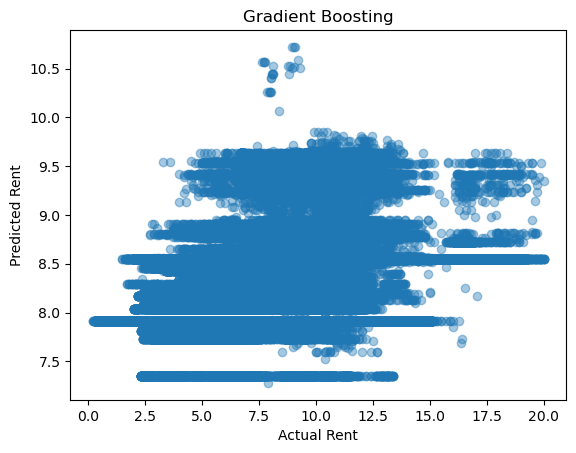

In [65]:
#import matplotlib.pyplot as plt
plt.scatter(y_test, gb_valid_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Gradient Boosting")
plt.show()

In [66]:
print(gb_model.score(x_train, y_train))

print(gb_model.score(x_test, y_test))

0.5942907051547877


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- feed_quantity
- water_quantity
Feature names seen at fit time, yet now missing:
- feed_quantity_0.0
- feed_quantity_1.0
- water_quantity_0.0
- water_quantity_1.0


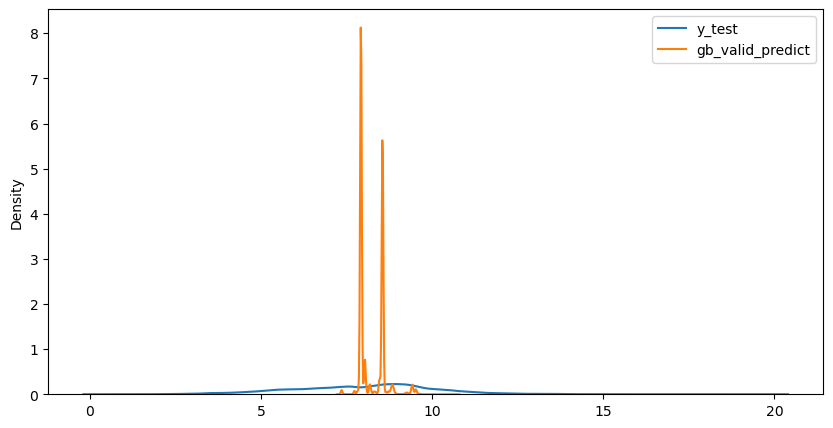

In [67]:
import seaborn as sns

plt.figure(figsize=(10, 5))
ax1 = sns.kdeplot(y_test, label="y_test")
ax2 = sns.kdeplot(gb_valid_predict, label="gb_valid_predict", ax=ax1)
plt.legend()
plt.show()

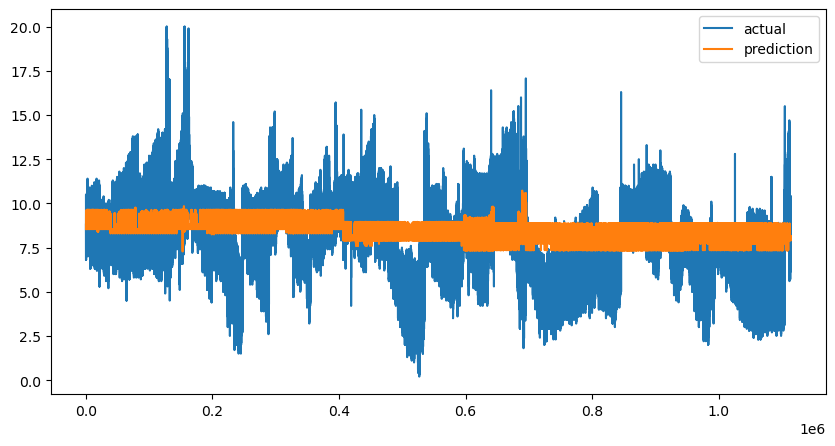

In [68]:
import seaborn as sns

plt.figure(figsize=(10, 5))
plt.plot(training.index, y_test, label = 'actual')
plt.plot(training.index, gb_valid_predict, label = 'prediction')
plt.legend()
plt.show()

In [ ]:
validation

,do_mg,do_temp,ph,orp,co2_mg,air_oxy,light_ma,feed_quantity,water_quantity
0,8.8,30.3,5.28,160.0,14.6,0.0,4.0,0.0,0.0
1,7.3,32.2,5.23,334.6,0.5,0.0,4.1,0.0,0.0
2,7.3,32.0,5.97,325.6,0.6,0.0,4.0,0.0,0.0
3,6.9,30.8,5.71,135.0,20.5,0.0,4.0,0.0,0.0
4,10.4,28.4,4.54,135.0,18.3,0.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1113743,9.8,28.7,5.04,216.9,32.5,11.3,4.2,0.0,0.0
1113744,6.6,29.3,4.80,213.0,35.6,1.4,4.1,0.0,0.0
1113745,9.7,29.0,4.60,220.2,21.9,3.7,3.5,0.0,0.0
1113746,8.6,29.2,5.22,215.2,31.0,15.0,4.1,0.0,0.0


In [ ]:
#oneday = validation[(validation['mea_dt'].str.contains('2021-07-21'))&(validation['tank_id']==1)]
oneday = validation[(validation.loc[:'2021-08-09 16:3'])&(validation['tank_id']==1)]
x_test_oneday = oneday[['do_temp', 'ph', 'orp', 'co2_mg', 'air_oxy', 'light_ma', 'feed_quantity', 'water_quantity']]
y_test_oneday = oneday[['do_mg']]
gb_valid_predict_oneday = gb_model.predict(x_test_oneday)

plt.figure(figsize=(10, 5))
plt.plot(training.index, y_test_oneday, label = 'actual')
plt.plot(training.index, gb_valid_predict_oneday, label = 'prediction')
plt.legend()
plt.show()

KeyError: 'tank_id'